In [10]:
import pandas as pd
import sklearn
# Print the version of scikit-learn
print(sklearn.__version__)
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s

startDate   =  "1995-10-01"
endDate     =  "2024-09-30"
model_months=  [6 ,7,8]
model_site  = [
    "13092747"  
              ]
idv         = [ "00060_Mean" ,"tmean" ,"Days_Since_October_1st" ]

df_cleaned = pd.read_csv("df_cleaned.csv")

df_cleaned

1.6.1


,Unnamed: 0,tmean,site_no,Date,rad_d,Days_Since_October_1st,00010_Mean,00060_Mean,Month,Year,water_year
0,42,23.403002,13092747,1996-07-13,4.906049,285,18.6,120.0,7,1996,1996
1,43,23.366001,13092747,1996-07-14,4.923263,286,18.4,130.0,7,1996,1996
2,44,24.110001,13092747,1996-07-15,4.940477,287,18.3,132.0,7,1996,1996
3,45,21.022001,13092747,1996-07-16,4.957691,288,17.9,134.0,7,1996,1996
4,46,21.528002,13092747,1996-07-17,4.974906,289,18.0,155.0,7,1996,1996
...,...,...,...,...,...,...,...,...,...,...,...
1372,2663,20.303099,13092747,2024-08-27,5.680688,330,16.0,150.0,8,2024,2024
1373,2664,15.999650,13092747,2024-08-28,5.697902,331,15.5,143.0,8,2024,2024
1374,2665,15.041100,13092747,2024-08-29,5.715116,332,14.6,143.0,8,2024,2024
1375,2666,18.663349,13092747,2024-08-30,5.732331,333,14.9,148.0,8,2024,2024


In [11]:
input=  df_cleaned[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  df_cleaned['00010_Mean'], test_size=0.2, random_state=42)

print(X_train)

print(y_train)

      00060_Mean      tmean  Days_Since_October_1st
453        242.0  16.012001                     326
588        107.0  19.823002                     277
243         94.5  22.113001                     300
371         88.5  18.363001                     244
649        109.0  20.578001                     246
...          ...        ...                     ...
1095       150.0  19.844000                     328
1130        63.1  20.542900                     271
1294       103.0  21.545650                     251
860         72.4  21.228399                     273
1126        68.3  19.048399                     267

[1101 rows x 3 columns]
453     15.7
588     17.5
243     17.2
371     15.8
649     18.0
        ... 
1095    15.6
1130    17.9
1294    18.5
860     17.6
1126    16.5
Name: 00010_Mean, Length: 1101, dtype: float64


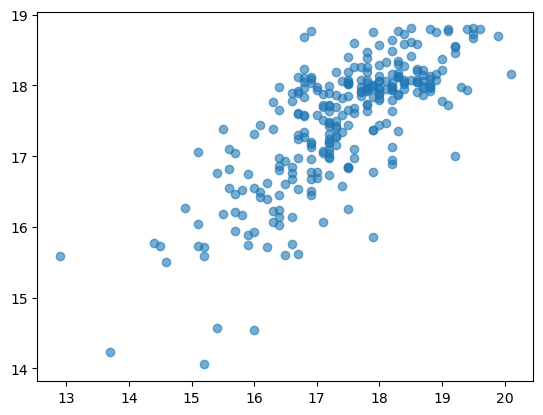

In [12]:
X= X_train
y= y_train

# Fit a GAM model with a smoothing spline on X
gam = LinearGAM(s(   1)).fit( X_train, y_train)

y_pred = gam.predict( X_test)

plt.scatter( y_test , y_pred, label=" ", alpha=0.6)
plt.show()

In [16]:
r2 = r2_score( y_test , y_pred)
print("r2:", r2)

# Number of samples and predictors
n =  X_test.shape[0]  # Number of test samples
#print(n)
p =  X_test.shape[1]  # Number of predictors
#print(p)

# Compute Adjusted R-squared
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("adj_r2:",adj_r2)

mse = mean_squared_error( y_test , y_pred )
rmse = np.sqrt(mse)
print("rmse:", rmse)

r2: 0.5598974440722024
adj_r2: 0.5550433717641752
rmse: 0.7458741574030577


In [17]:
print(gam.statistics_)

{'n_samples': 1101, 'm_features': 3, 'edof_per_coef': array([8.18186120e-01, 3.63030173e-01, 3.72811162e-01, 4.55140092e-01,
       6.17249311e-01, 5.86617032e-01, 6.42465307e-01, 7.19106833e-01,
       7.25464002e-01, 7.61580191e-01, 7.95655409e-01, 8.22899860e-01,
       8.50679680e-01, 8.57802693e-01, 8.77144209e-01, 8.39377867e-01,
       8.12102205e-01, 7.09054128e-01, 6.69869473e-01, 3.13107047e-02,
       2.06603347e-21]), 'edof': 13.327546451766752, 'scale': 0.5876329366509511, 'cov': array([[ 7.02461739e-01,  3.25204534e-01, -1.19433940e-02,
        -1.25289302e-01, -7.73258643e-02, -4.26017463e-02,
        -4.71517103e-02, -4.99092499e-02, -4.84601653e-02,
        -4.83689351e-02, -4.83511283e-02, -4.82365317e-02,
        -4.81919980e-02, -4.82375246e-02, -4.79939094e-02,
        -4.86813307e-02, -4.74346927e-02, -4.82818420e-02,
        -6.28177639e-02, -8.03752108e-02,  4.80139877e-02],
       [ 3.25204534e-01,  1.74004683e-01,  3.35956944e-02,
        -4.12623878e-02, -4.2